Git Hub Repo: https://github.com/MatthewThompson35/DataAnalyticsProject1
Project 1: NBA Stats from 1980 to 2021
Dataset: https://www.kaggle.com/datasets/blitzapurv/nba-players-data-1950-to-2021
This dataset is a collection of NBA stats for each player in the league from 1950 to 2021, but I limited it to 1980-2021 because of how big the data set was and the presence of missing data.

    I want to investigate the dataset and view how player stats have changed over the years as the sport of basketball has evolved. Specifically I want to see the correlation between player efficiency rating and age. I also want to see how the average Player efficiency rating has changed over the years as basketball has gotten harder. Another Questions I would like to answer is how Field Goal Percentage varys by position and why.
    
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('seasons_stats.csv', encoding='ISO-8859-1')
df = df[df['Year'] >= 1980]
print("Number of rows:", df.shape[0]) 


nulls = df[df.isna().any(axis=1)].shape[0]
print("Number of rows with missing values:", nulls)


df.dropna(inplace=True)
print("Number of rows:", df.shape[0])


df['Player'].replace('Ãlex Abrines', 'Alex Abrines', inplace=True) # I did not use names for anything so this didnt affect my data
df.drop(columns=['Unnamed: 0', 'STL', 'ORB', 'DRB', 'TRB', 'G', '3PAr', 'Tm', "GS", "MP", "FG", "3P", '3PA', "2P", '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'AST', 'BLK', 'TOV', 'PF', 'TS%', 'FTr', 'ORB%', "DRB%", 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'], axis=1, inplace=True)
print(df.columns)
print(df.dtypes)


Number of rows: 22360
Number of rows with missing values: 4700
Number of rows: 17660
Index(['Year', 'Player', 'Pos', 'Age', 'FGA', 'FG%', '3P%', 'FT%', 'PTS',
       'PER'],
      dtype='object')
Year        int64
Player     object
Pos        object
Age       float64
FGA         int64
FG%       float64
3P%       float64
FT%       float64
PTS         int64
PER       float64
dtype: object


The dataset does have outliers, but they are not outliers that affect the visualization as they are stats for players. I dropped columns that I did not need to use for these calculations

Correlation between PER and Age

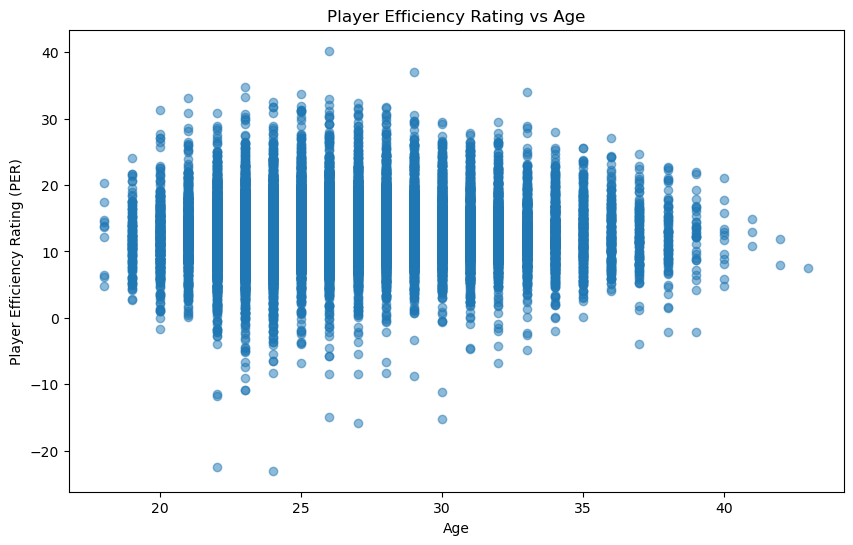

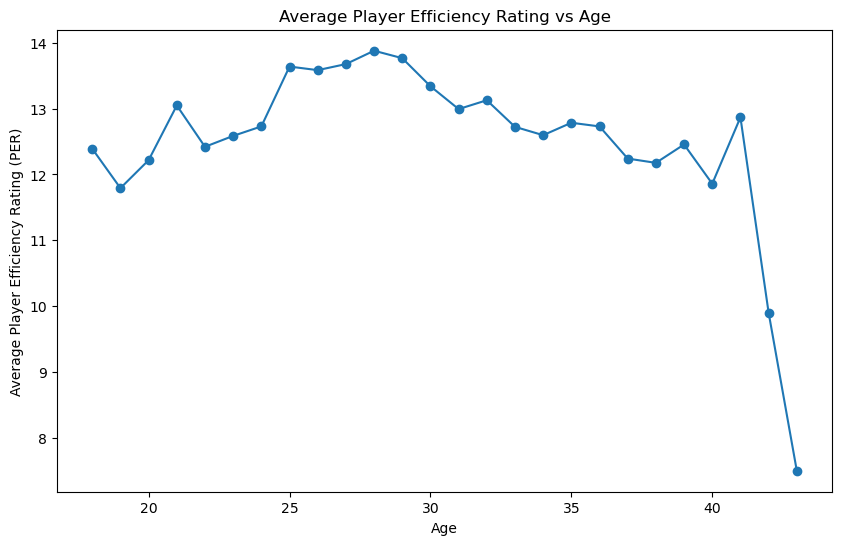

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['PER'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Player Efficiency Rating (PER)')
plt.title('Player Efficiency Rating vs Age')
plt.show()

pivot_table = df.pivot_table(index='Age', values='PER', aggfunc='mean')
pivot_table = pivot_table.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(pivot_table['Age'], pivot_table['PER'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Player Efficiency Rating (PER)')
plt.title('Average Player Efficiency Rating vs Age')
plt.show()

The two variables being described by the plot are Player efficiency rating and age. Player efficiency rating is rating on how efficient a player is per minute based on there positive accomplishments. In the top scatterplot I would say there isnt a clear trend for the data. There are some outliers in the data that dont seem to be affected by age. Those points are probably rookies that just came into the season and either did really good or really bad. The data is grouped closely together in the 3%-25% efficency range. As the age of players inrease the spread of the data gets smaller getting closer together. This is most likely because the players have been playing for so long they start to get consistent at what they do and dont tend to fluctuate up and down like some of the younger players in the league.

For the bottom chart it shows average player efficiency rating at each age. In this chart it has a positive linear trend up until around age 25-27. This makes sense because mid to late 20s is when players are at their peak athleticism and body health. After that the data goes on a negative linear trend. There are outliers once age gets past 42. This is most likely because of how old the player is and they can not perferm in the competitive sport like they have been in the past and stop playing shortly after. After the mid 20s as age goes up the average PER tends to go downwards.

Player Efficiency Rating change over time:

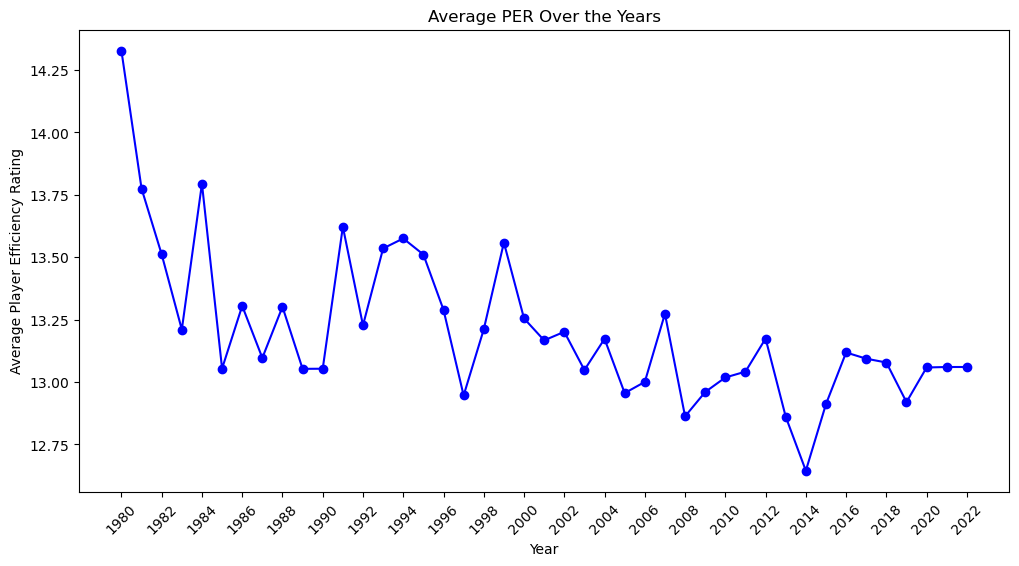

In [3]:
average_per = df.groupby('Year')['PER'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(average_per['Year'], average_per['PER'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.xticks(range(1980, 2024, 2), rotation=45)
plt.ylabel('Average Player Efficiency Rating')
plt.title('Average PER Over the Years')


plt.show()

In this line chart, it displays the average Player Efficiency Rating from 1980-2020. The average PER shows a downward trend showing effeciency is going down and is fluctuating yearly. In 1980 the player efficiency rating was very high as there was less defensive presence and the rules of basketball had not been set. Over the years where more rules were set in place and the game of basketball evolved, the player efficiency rating seemed to drop and fluctuate. The lowest average PER was in 2014. This is most likely due to injuries, strong deffensive pressence or even a large influx of rookies joining into the league. In conclusion, PER is a strong variable in determining the effieciency of a player, but it also shows the competitive nature of the league at that time with a low average PER.

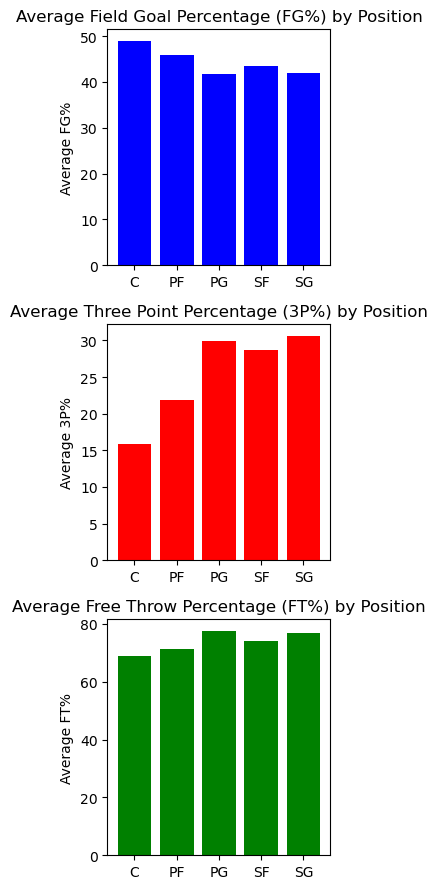

In [6]:
selected_positions = ['PG', 'SG', 'SF', 'PF', 'C']
position_df = df[df['Pos'].isin(selected_positions)]

avg_fg = position_df.groupby('Pos')['FG%'].mean()
avg_3p = position_df.groupby('Pos')['3P%'].mean()
avg_ft = position_df.groupby('Pos')['FT%'].mean()

fig, axs = plt.subplots(3, 1, figsize=(3, 9))

axs[0].bar(avg_fg.index, avg_fg.values * 100, color='blue')
axs[0].set_title('Average Field Goal Percentage (FG%) by Position')
axs[0].set_ylabel('Average FG%')

axs[1].bar(avg_3p.index, avg_3p.values * 100, color='red')
axs[1].set_title('Average Three Point Percentage (3P%) by Position')
axs[1].set_ylabel('Average 3P%')

axs[2].bar(avg_ft.index, avg_ft.values * 100, color='green')
axs[2].set_title('Average Free Throw Percentage (FT%) by Position')
axs[2].set_ylabel('Average FT%')

plt.subplots_adjust(wspace=20)
plt.tight_layout()
plt.show()





The above graphs show the average shooting percentage in each category based on positions. 

For FG% The Center position leads with the highest shooting percentage. This is because they usually tend to take closer shots that are easier to be made since they are closer to the basket most of the time. The trend for FG% goes downward based on the positions ordered by heights which also correlates to the type of shots that they take combined with their athleticism. The lowest percentage is the Point guard position. These players are usually the shortest on their team and hold the ball most of the time. They are usually tasked with taking more difficult shots than any other position so the lower shot percentage follows.

For 3P% the SG have the highest percentage closely followed by the PG. This is most likely because of their smaller builds and position on the court. They are able to move around the 3 point line a lot faster than the other positions leading them to having more open shots. The lowest percentage is the Center position. This is because they spend most of their time inside instead of at the 3 point line and because of their big builds and high wing spans, they can not get easy shots. These percentages are the opposite of the FG% and increase as the height of a player goes down.

For FT% This is a little different. Every position shoots from the same spot on the court and have an equal chance at making it because they are not being guarded. This comes down to how well you can shoot the ball. In this graph the trends follow the same as 3P% where PG and SG have the highest positions and it decreases as the positions get taller. This most likely occurs because it is harder to shoot with higher wingspans.

Overall the trends could be predicted from the start, and there are no outliers that would make the results seem off.


Summary:

Overall the findings from this project were to be as expected and did not provide any shocking discoveries. From the first question I noticed that the peak efficiency rating for players is the mid 20s to upper 20s. After that players begin to become less efficient. For the second questions I noticed that The player efficiency rating has steadily decreased over the years since 1980. In the third questions I noticed that smaller players tend to shoot better than the bigger players, which is probably combined with their speed around the court. To be able to further explore this topic, I think that I would need data for each team, so that I could possibly compare a players stats to their teams stats or compare each teams stats with one another to find more results. But that would require more features or another dataset.